In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1. Data Loading and Exploration:**

In [5]:
file = pd.read_csv('/content/drive/MyDrive/GENAI/Week3/Day4/train.csv')
df = pd.DataFrame(file)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.shape[0]

2000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# **2. Data Cleaning and Preprocessing:**

In [9]:
df.isna().mean() * 100

,0
battery_power,0.0
blue,0.0
clock_speed,0.0
dual_sim,0.0
fc,0.0
four_g,0.0
int_memory,0.0
m_dep,0.0
mobile_wt,0.0
n_cores,0.0


There isn't nan values nor categorical data

# **3. Statistical Analysis with NumPy and SciPy:**

In [25]:
modes = df.mode().T
mode_joined = modes.apply(lambda row: ', '.join(row.dropna().astype(str)), axis = 1)

In [26]:
stats = pd.DataFrame({
    'mean' : df.mean(),
    'median' : df.median(),
    'mode' : mode_joined,
    'range' : df.max() - df.min(),
    'variance' : df.var(),
    'standard_deviation' : df.std(),
    'skewness' : df.skew(),
    'kurtosis' : df.kurt()
})

stats

,mean,median,mode,range,variance,standard_deviation,skewness,kurtosis
battery_power,1238.51850,1226.0,"618.0, 1589.0, 1872.0",1497.0,1.930884e+05,439.418206,0.031898,-1.224144
blue,0.49500,0.0,0.0,1.0,2.501001e-01,0.500100,0.020016,-2.001602
clock_speed,1.52225,1.5,0.5,2.5,6.658629e-01,0.816004,0.178084,-1.323417
dual_sim,0.50950,1.0,1.0,1.0,2.500348e-01,0.500035,-0.038035,-2.000555
fc,4.30950,3.0,0.0,19.0,1.884813e+01,4.341444,1.019811,0.277076
four_g,0.52150,1.0,1.0,1.0,2.496626e-01,0.499662,-0.086144,-1.994575
int_memory,32.04650,32.0,27.0,62.0,3.292670e+02,18.145715,0.057889,-1.216074
m_dep,0.50175,0.5,0.1,0.9,8.318353e-02,0.288416,0.089082,-1.274349
mobile_wt,140.24900,141.0,182.0,120.0,1.253136e+03,35.399655,0.006558,-1.210376
n_cores,4.52050,4.0,4.0,7.0,5.234197e+00,2.287837,0.003628,-1.229750


In [31]:
groups = [group["battery_power"] for _, group in df.groupby("price_range") if len(group) > 1]

In [32]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("There is a significant difference in terms of battery between the price ranges.")
else:
    print("There is no significant difference in terms of battery between the price ranges.")

There is a significant difference in terms of battery between the price ranges.


In [40]:
from scipy.stats import pearsonr

target_col = "price_range"
corr_dict = {}

for col in df.columns:
    if col != target_col:
        corr, _ = pearsonr(df[col], df[target_col])
        corr_dict[col] = corr

corr_dict = corr_df = pd.DataFrame(data=[corr_dict], index=["price"])
corr_dict

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price,0.200723,0.020573,-0.006606,0.017444,0.021998,0.014772,0.044435,0.000853,-0.030302,0.004399,0.033599,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859,0.023611,-0.030411,0.018785


In [46]:
from scipy.stats import spearmanr

target_col = "price_range"
corr_dict = {}

for col in df.columns:
    if col != target_col:
        corr, _ = spearmanr(df[col], df[target_col])
        corr_dict[col] = corr

corr_dict = corr_df = pd.DataFrame(data=[corr_dict], index=["price"])
corr_dict

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price,0.199991,0.020573,-0.005436,0.017444,0.024167,0.014772,0.044278,-0.000322,-0.030214,0.004651,0.032824,0.131884,0.165134,0.91708,0.023727,0.024776,0.022138,0.023611,-0.030411,0.018785


# **4. Data Visualization with Matplotlib:**

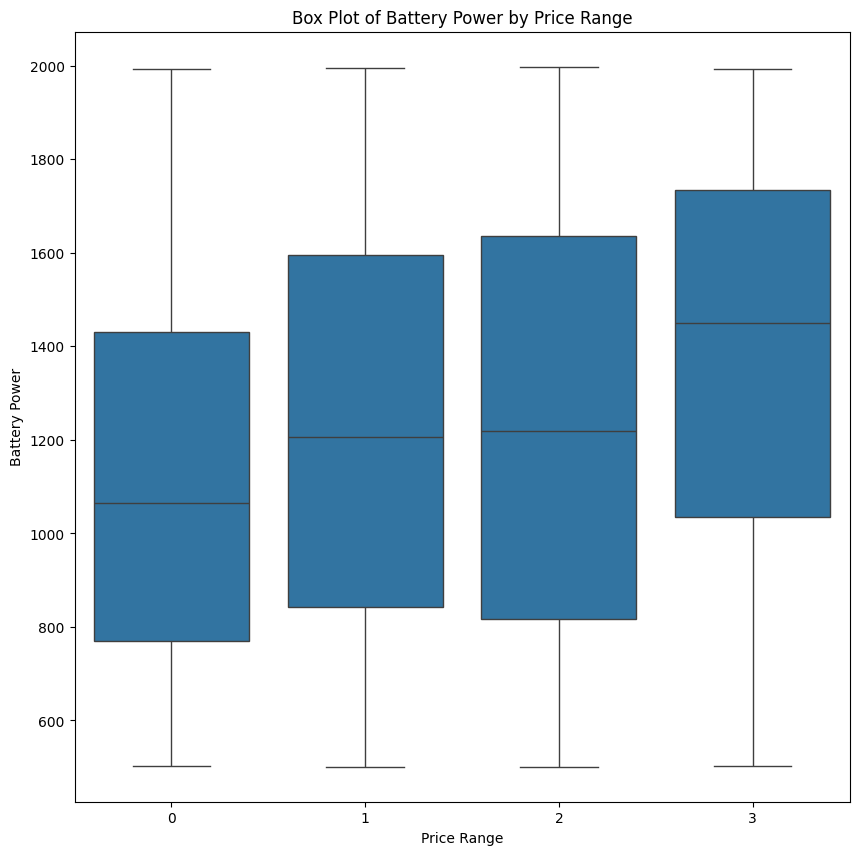

In [62]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df["price_range"], y=df["battery_power"])
plt.title("Box Plot of Battery Power by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Battery Power")
plt.show()

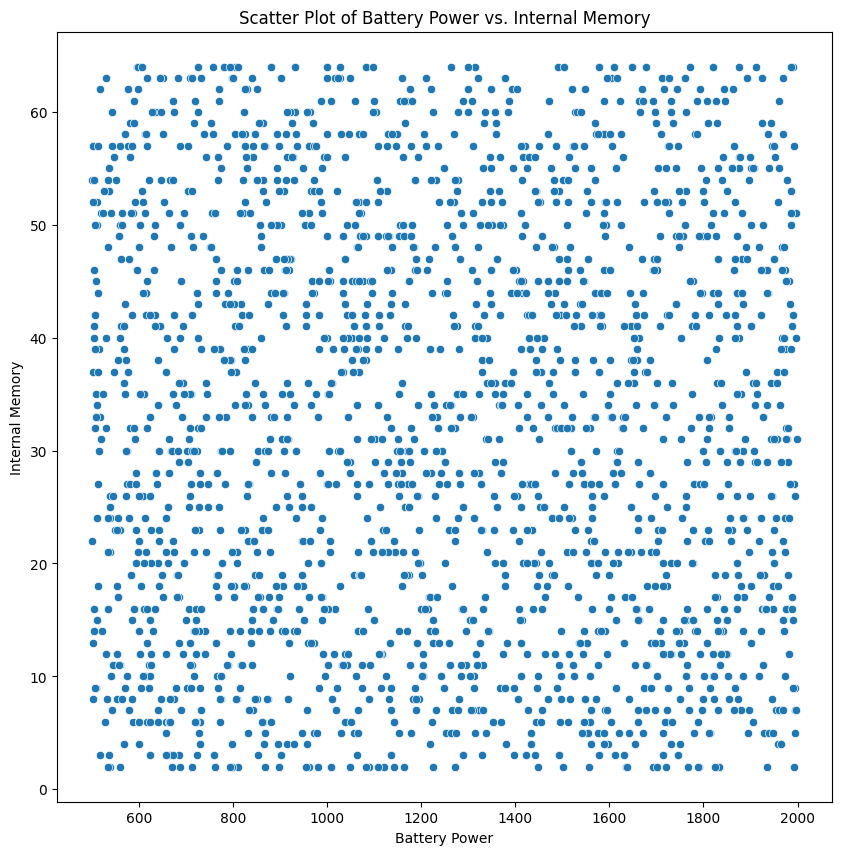

In [63]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df["battery_power"], y=df["int_memory"])
plt.title("Scatter Plot of Battery Power vs. Internal Memory")
plt.xlabel("Battery Power")
plt.ylabel("Internal Memory")
plt.show()

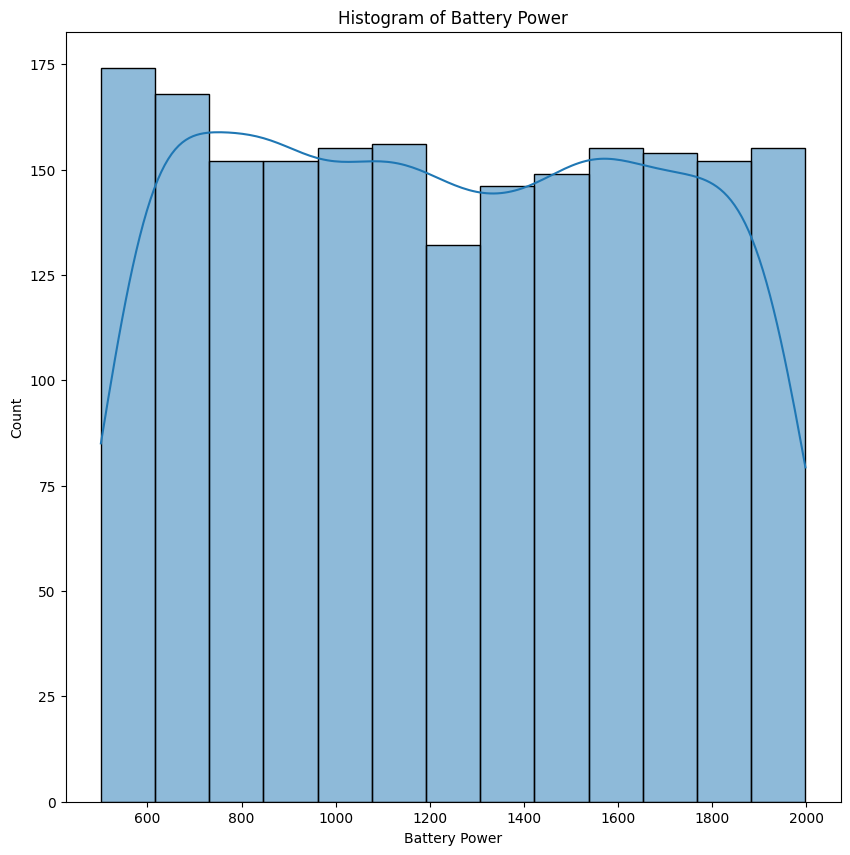

In [80]:
plt.figure(figsize=(10, 10))
sns.histplot(x="battery_power", data=df, kde= True)
plt.title("Histogram of Battery Power")
plt.xlabel("Battery Power")
plt.ylabel("Count")
plt.show()

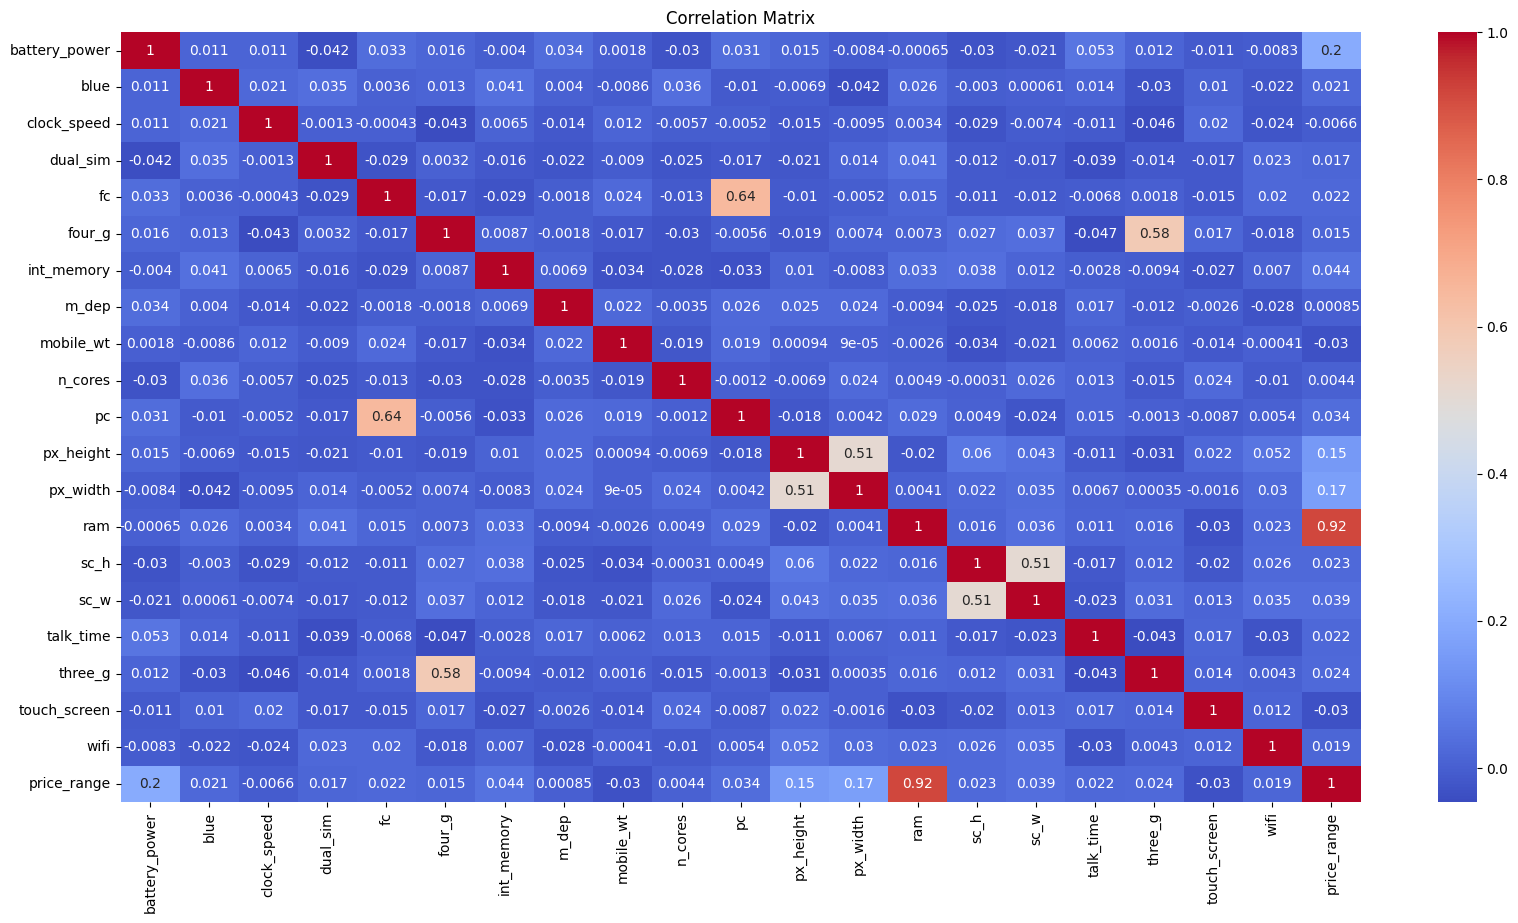

In [60]:
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **5. Insight Synthesis and Conclusion:**



*   There is no strong correlation between smartphone price and most features, except for RAM, which shows a strong association, and battery power, which has a modest influence.

*   This suggests that these features may no longer significantly affect smartphone pricing, likely because they have become standard across most modern devices.



